In [31]:
import numpy as np
import random


In [20]:
def data_generator(board, boards, i):
    if i < 9:
        for value in [1, 0, -1]:  # Iteramos sobre los posibles valores
            new_board = board.copy()  # Creamos una copia del tablero actual
            new_board[i] = value  # Modificamos solo la posición actual
            boards.append(new_board)  # Añadimos la copia a boards
            data_generator(new_board, boards, i + 1)  # Llamada recursiva con la copia
    return boards

In [21]:
# Función de activación sigmoide y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [22]:

def sigmoid_derivative(x):
    return x * (1 - x)


In [23]:

# Inicialización del dataset
input_data = np.array(data_generator([0]*9, [], 0))
output_data = input_data.copy()  # Queremos que aprenda a replicar los datos de entrada


In [24]:

# Normalización para que los datos estén entre 0 y 1
input_data = (input_data + 1) / 2
output_data = (output_data + 1) / 2


In [25]:

# Parámetros de la red
input_size = 9
hidden_size = 9  # Número de neuronas en la capa oculta
output_size = 9
learning_rate = 0.1
epochs = 10000


In [26]:

# Inicialización aleatoria de pesos y sesgos
np.random.seed(42)
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
bias_output = np.random.uniform(-1, 1, (1, output_size))


In [27]:

# Entrenamiento de la red
for epoch in range(epochs):
    # Propagación hacia adelante
    hidden_layer_input = np.dot(input_data, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Cálculo del error
    error = output_data - predicted_output
    mse = np.mean(np.square(error))

    # Propagación hacia atrás
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = np.dot(d_predicted_output, weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Actualización de pesos y sesgos
    weights_hidden_output += np.dot(hidden_layer_output.T, d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += np.dot(input_data.T, d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Mostrar el progreso cada 1000 épocas
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {mse:.5f}")


Epoch 0, Error: 0.20912
Epoch 1000, Error: 0.40742
Epoch 2000, Error: 0.40742
Epoch 3000, Error: 0.40742
Epoch 4000, Error: 0.40742
Epoch 5000, Error: 0.40742
Epoch 6000, Error: 0.40742
Epoch 7000, Error: 0.40742
Epoch 8000, Error: 0.40742
Epoch 9000, Error: 0.40742


In [55]:

# Validación: Ver si la red puede replicar los datos de entrada
print("\nPredicción después del entrenamiento:")
predicted_output = (predicted_output > 0.5).astype(int)  # Umbral para clasificar en 0/1
# print(predicted_output * 2 - 1)  # Desnormalizar para mostrar -1, 0, 1
rand_index = random.randint(0,100)
print(rand_index)
print(predicted_output[rand_index])



Predicción después del entrenamiento:
22
[1 1 1 1 1 0 0 0 1]


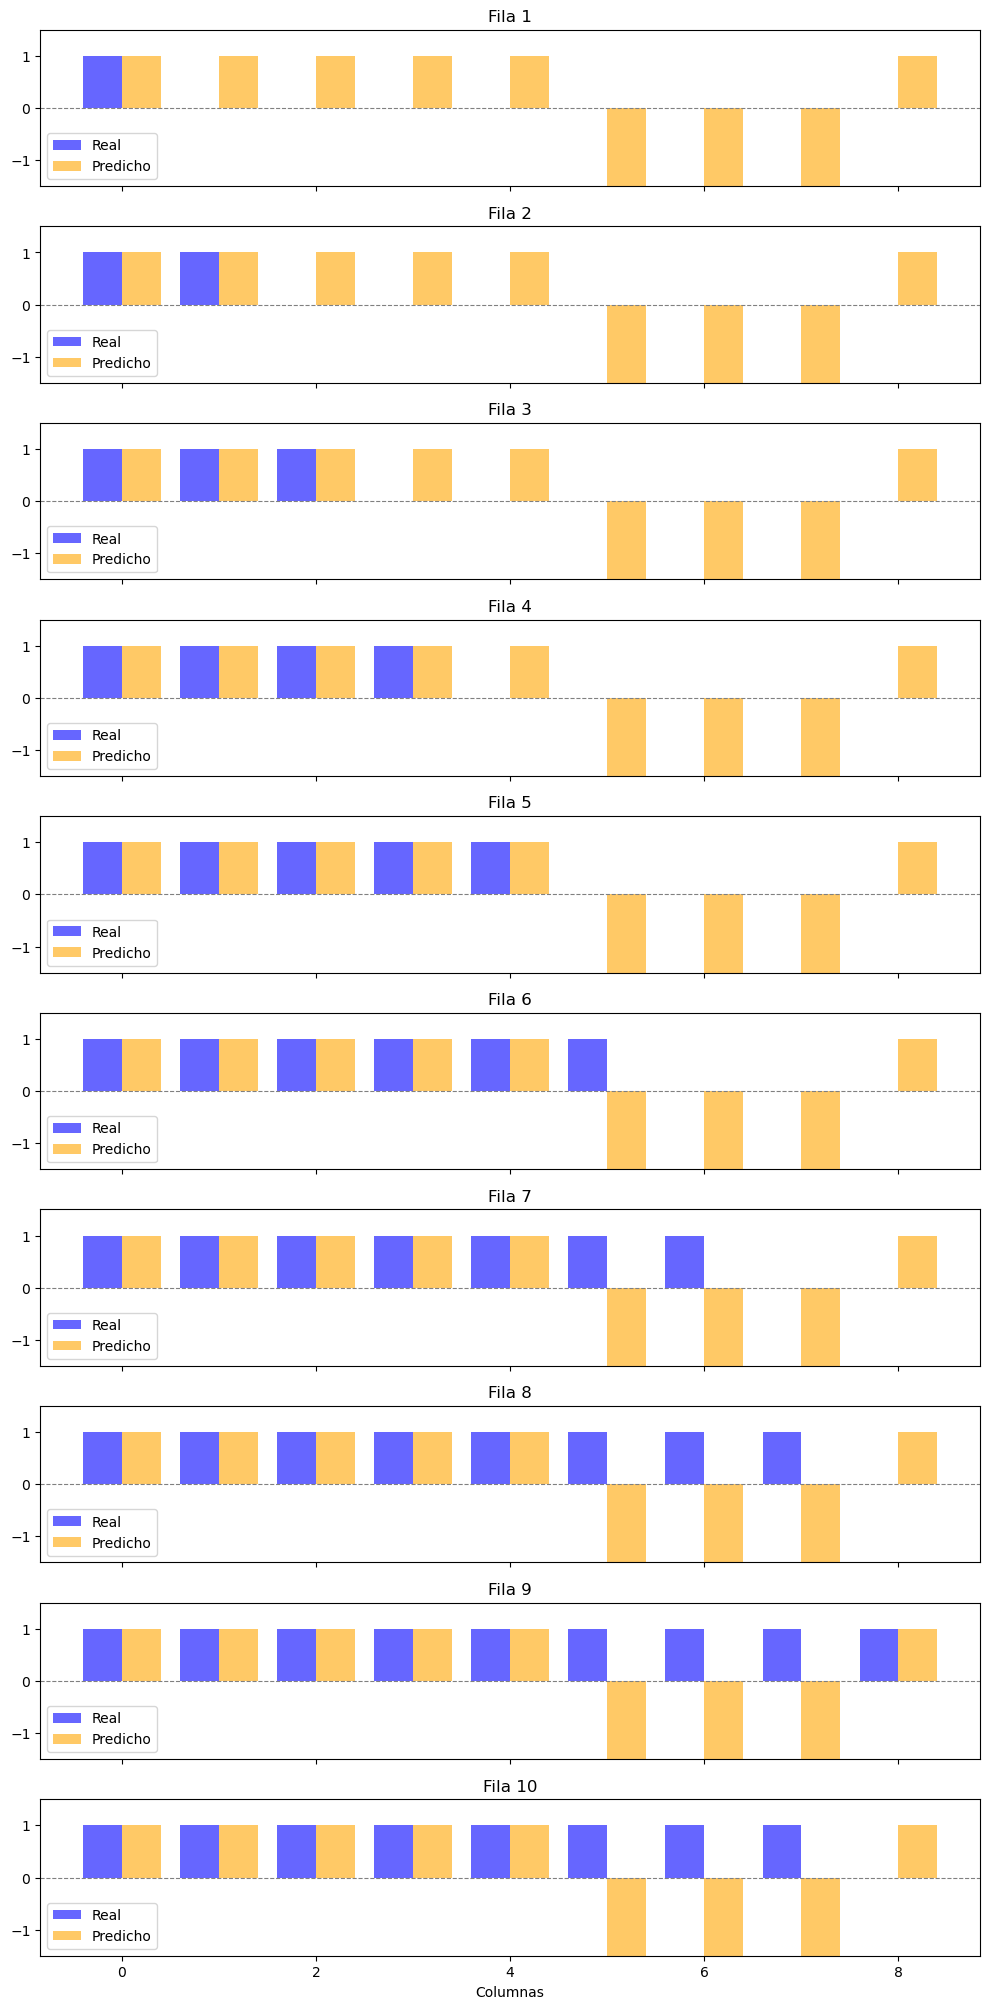

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Desnormalizar los datos reales y predichos (-1, 0, 1)
real_output = output_data * 2 - 1
predicted_output = predicted_output * 2 - 1

# Seleccionar las primeras 10 filas para graficar
num_samples = 10
real_output_subset = real_output[:num_samples]
predicted_output_subset = predicted_output[:num_samples]

# Crear la figura
fig, axs = plt.subplots(num_samples, figsize=(10, num_samples * 2), sharex=True)

for i in range(num_samples):
    x = np.arange(9)  # Índices de las columnas

    # Graficar los valores reales y predichos
    axs[i].bar(x - 0.2, real_output_subset[i], width=0.4, alpha=0.6, label="Real", color='blue')
    axs[i].bar(x + 0.2, predicted_output_subset[i], width=0.4, alpha=0.6, label="Predicho", color='orange')

    # Añadir una línea base para resaltar los ceros
    axs[i].axhline(0, color='gray', linewidth=0.8, linestyle='--')
    axs[i].set_title(f"Fila {i+1}")
    axs[i].set_ylim(-1.5, 1.5)  # Rango adecuado para -1, 0, 1
    axs[i].legend()

plt.tight_layout()
plt.xlabel("Columnas")
plt.show()
